# <font color="#F20400"> NETFLIX RECOMMENDATION SYSTEMS

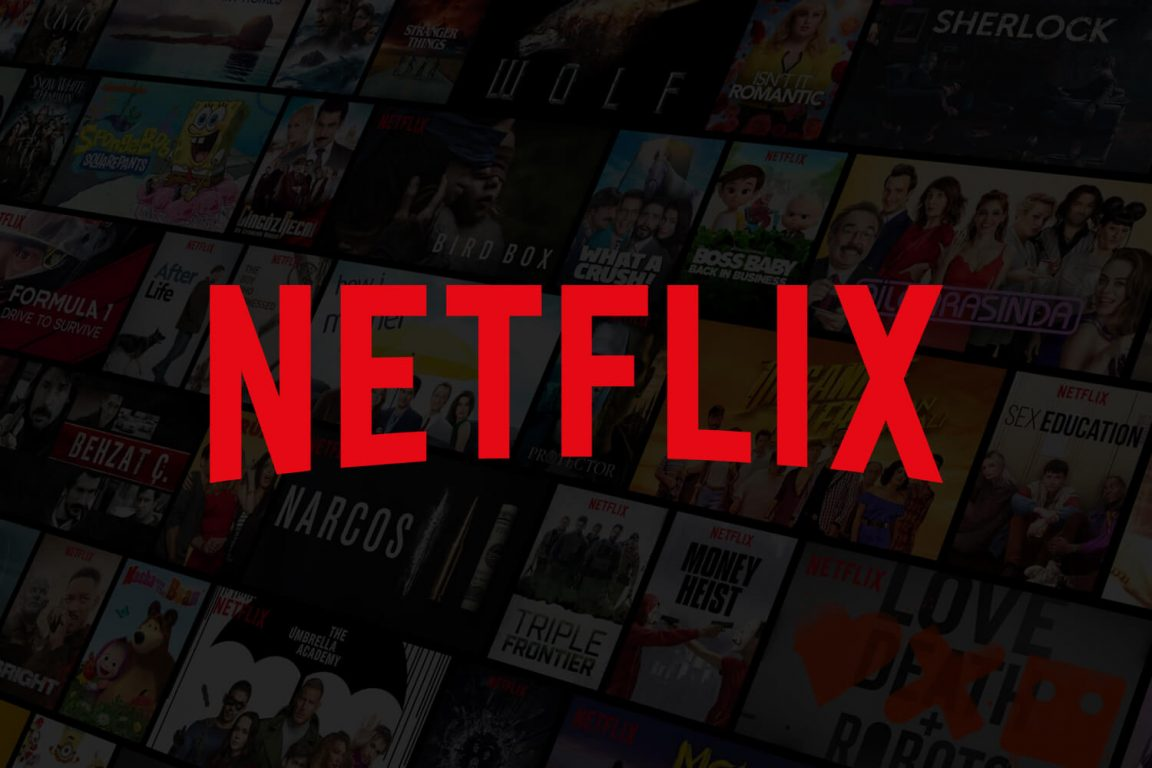

## <font color="#F20400"> AIM
The aim of this project is to build a recommendation system for Netflix users. This system will suggest movies and TV shows based on user preferences and viewing history, enhancing the user experience by providing personalized recommendations. 

## <font color="#F20400">  Dataset Description
The dataset contains information about movies and TV shows available on Netflix. Each record represents a unique content item with various attributes describing its metadata. Below is a detailed explanation of the columns in the dataset:

### <font color="#F20400"> Columns:
1. **Show Id**: A unique identifier for each content item.
2. **Title**: The title of the movie or TV show.
3. **Description**: A brief summary of the content's storyline or theme.
4. **Director**: The director(s) of the content (if applicable).
5. **Genres**: The genres associated with the content, such as Horror, Comedy, or Documentary.
6. **Cast**: The main actors or actresses featured in the content.
7. **Production Country**: The country where the content was produced.
8. **Release Date**: The year when the content was released.
9. **Rating**: The age rating of the content (e.g., TV-MA, TV-14).
10. **Duration**: The length of the content (in minutes for movies or number of seasons for TV shows).
11. **Imdb Score**: The IMDb rating of the content, showing user feedback and quality.
12. **Content Type**: Indicates whether the item is a "Movie" or a "TV Show."
13. **Date Added**: The date when the content was added to Netflix.

## <font color="#F20400"> Objective
By leveraging this dataset, the project aims to:
- Analyze user preferences based on genres, ratings, and IMDb scores.
- Use similarity measures (e.g., cosine similarity) to recommend similar content to users.

## <font color="#F20400"> Requirements

In [98]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)


import nltk
nltk.download("stopwords")
import re
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <font color="#F20400"> Import Data

In [21]:
df=pd.read_csv("netflixData.csv")

## <font color="#F20400"> EDA (Exploratory Data Analysis)

In [24]:
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [28]:
df.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [30]:
df=df[["Title","Description","Content Type","Genres"]]
df.head()

,Title,Description,Content Type,Genres
0,(Un)Well,This docuseries takes a deep dive into the luc...,TV Show,Reality TV
1,#Alive,"As a grisly virus rampages a city, a lone man ...",Movie,"Horror Movies, International Movies, Thrillers"
2,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...",Movie,"Documentaries, International Movies"
3,#blackAF,Kenya Barris and his family navigate relations...,TV Show,TV Comedies
4,#cats_the_mewvie,This pawesome documentary explores how our fel...,Movie,"Documentaries, International Movies"


In [34]:
df.isnull().sum()

Title           0
Description     0
Content Type    0
Genres          0
dtype: int64

## <font color="#F20400"> Preprocess Text

In [42]:
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words("english"))
def clean_text(text_column):
    # Convert to lowercase
    df[text_column] = df[text_column].str.lower()
    
    # Remove unwanted characters
    df[text_column] = df[text_column].str.replace('[^\w\s]', '', regex=True)
    df[text_column] = df[text_column].str.replace('\w*\d\w*', '', regex=True)
    df[text_column] = df[text_column].str.replace('\n', '', regex=True)
    df[text_column] = df[text_column].str.replace('\r', '', regex=True)
    df[text_column] = df[text_column].str.replace('https?://\S+|www\.\S+', '', regex=True)
    df[text_column] = df[text_column].str.replace('<.*?>+', '', regex=True)
    df[text_column] = df[text_column].str.replace('\[.*?\]', '', regex=True)
    
    # Remove stopwords and apply stemming
    df[text_column] = df[text_column].apply(lambda x: ' '.join(
        stemmer.stem(word) 
        for word in x.split() 
        if word not in stopword
    ))
    return df[text_column]

In [46]:
df["Title"]=clean_text("Title")

In [48]:
df["Title"].head()

0                       unwel
1                        aliv
2    annefrank parallel stori
3                     blackaf
4              cats_the_mewvi
Name: Title, dtype: object

## <font color="#F20400"> Modelling

In [128]:
feature = df["Genres"].tolist()
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["Genres"])
similarity = cosine_similarity(tfidf_matrix)

In [130]:
indices=pd.Series(df.index,index=df["Title"]).drop_duplicates()

In [148]:
def netflix_recommendation(title, df=df, similarity=similarity):    
    index = indices[title] 
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:11]  # Exclude self
    movie_indices = [i[0] for i in similarity_scores]
    return df["Title"].iloc[movie_indices]

In [150]:
netflix_recommendation("girlfriend")

285                      washington
417                  arrest develop
434      astronomi club sketch show
451     aunti donna big ol hous fun
656                       big mouth
752                 bojack horseman
805                    brew brother
935                        champion
937                   chappell show
1077                      communiti
Name: Title, dtype: object

In [152]:
netflix_recommendation("sun")

69                                        
113                            heavi heart
121                             littl chao
152                                    sun
170                            yellow bird
174                             aalorukkam
228                                  ahaan
240                         ajeeb daastaan
256    albert pinto ko gussa kyun aata hai
354                          breath normal
Name: Title, dtype: object

## <font color="#F20400"> Results

The recommendation system allows users to input the title of a movie or TV show, and it provides a list of similar content based on the genres. Using the TF-IDF vectorizer and cosine similarity, the system analyzes the genre descriptions to find content with the highest similarity to the input title.

This recommendation system provides personalized suggestions by identifying related genres and similar content, enhancing user engagement and helping users explore more movies and TV shows they may enjoy.